# Determining the difference in variant calling in human-only samples `004` and `005`

**Gregory Way 2018**

Samples `004` and `005` are human tumors.
They were previously included in the entire `disambiguate` pipeline, where the WES reads were aligned to both human and mouse genomes.

In the pipeline, all WES reads are aligned to both genomes.
Reads are then "disambiguated" to either species in which the species with the highest alignment score per read is assigned that given read.
There was some interesting variants observed in the human only samples that appeared to belong only to mouse.
We hypothesized that the reason we are observing these variants is because of an error in the disambiguation step.

To determine if this was the case, I also aligned the two samples to the human genome only, and called variants in these files.

The following script compares the variants called in `004` and `005` between the `disambiguate` pipeline and the `human-only` pipeline.

## Note - we use the human-only pipeline reads for all downstream analyses for these two samples

Specifically, this means that the entire analysis pipeline is performed using variants called from the human-only pipeline for sampels `004` and `005`.

In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [2]:
%matplotlib inline

In [3]:
human_dir = os.path.join('results', 'annotated_vcfs_humanonly')
disambig_dir = os.path.join('results', 'annotated_merged_vcfs')

human_samples = ['004-primary', '005-primary']

In [4]:
human_sample_dict = {}

for pdx_dir, pdx_type in [[human_dir, 'human'], [disambig_dir, 'disambig']]:
    for human_sample in human_samples:
        file = os.path.join(pdx_dir,
                            '{}.annotated.hg19_multianno.csv'.format(human_sample))
        pdx_df = pd.read_csv(file)
        pdx_key = '{}_{}'.format(pdx_type, human_sample)
        human_sample_dict[pdx_key] = pdx_df

/home/gway/anaconda3/envs/pdx-exomeseq-analysis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
human_004 = set(human_sample_dict['human_004-primary'].cosmic70)
disambig_004 = set(human_sample_dict['disambig_004-primary'].cosmic70)

human_005 = set(human_sample_dict['human_005-primary'].cosmic70)
disambig_005 = set(human_sample_dict['disambig_005-primary'].cosmic70)

## Visualize the difference in called variants

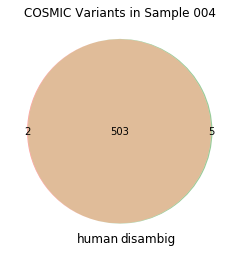

In [6]:
venn2([human_004, disambig_004], set_labels = ('human', 'disambig'))
plt.title("COSMIC Variants in Sample 004")

file = os.path.join('figures', 'human_only_venn_004.png')
plt.savefig(file)

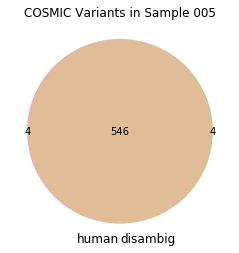

In [7]:
venn2([human_005, disambig_005], set_labels = ('human', 'disambig'))
plt.title("COSMIC Variants in Sample 005")

file = os.path.join('figures', 'human_only_venn_005.png')
plt.savefig(file)

## What are the variants themselves?

In [8]:
mouse_only_004 = disambig_004 - human_004
human_sample_dict['disambig_004-primary'].query('cosmic70 in @mouse_only_004')

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,...,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds,Otherinfo
88073,3,178922430,178922430,A,G,intronic,PIK3CA,.,.,.,...,.,.,.,.,.,.,.,.,.,het\t.\t19
88796,3,184429133,184429133,-,TCC,exonic,MAGEF1,.,nonframeshift insertion,MAGEF1:NM_022149:exon1:c.476_477insGGA:p.E158_...,...,.,.,.,.,.,.,.,.,.,het\t.\t136
154168,6,116600465,116600465,-,CAC,exonic,TSPYL1,.,nonframeshift insertion,TSPYL1:NM_003309:exon1:c.528_529insGTG:p.V176_...,...,.,.,.,.,.,.,.,.,.,het\t.\t526
350469,19,11105608,11105608,T,C,exonic,SMARCA4,.,synonymous SNV,"SMARCA4:NM_001128845:exon8:c.T1524C:p.H508H,SM...",...,.,.,.,.,.,.,.,.,.,het\t.\t275
355270,19,40368844,40368844,G,A,exonic,FCGBP,.,synonymous SNV,FCGBP:NM_003890:exon28:c.C12504T:p.S4168S,...,.,.,.,.,.,.,.,.,.,het\t.\t748


In [9]:
human_only_004 = human_004 - disambig_004
human_sample_dict['human_004-primary'].query('cosmic70 in @human_only_004')

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,...,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds,Otherinfo
212672,9,113166697,113166697,T,A,exonic,SVEP1,.,synonymous SNV,SVEP1:NM_153366:exon39:c.A9576T:p.V3192V,...,.,.,.,.,.,.,.,.,.,het\t.\t712
275810,13,25744713,25744713,C,A,exonic,AMER2,.,nonsynonymous SNV,AMER2:NM_152704:exon1:c.G1045T:p.A349S,...,T,0.598,0,-2.39,-0.718,-0.632,0.957,0.163,8.909,het\t.\t64


In [10]:
mouse_only_005 = disambig_005 - human_005
human_sample_dict['disambig_005-primary'].query('cosmic70 in @mouse_only_005')

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,...,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds,Otherinfo
21980,1,154842199,154842199,-,GCTGCTGCTGCTGCT,exonic,KCNN3,.,nonframeshift insertion,KCNN3:NM_001204087:exon1:c.241_242insAGCAGCAGC...,...,.,.,.,.,.,.,.,.,.,het\t.\t132
25680,1,169510637,169510637,T,G,exonic,F5,.,nonsynonymous SNV,F5:NM_000130:exon13:c.A3691C:p.I1231L,...,T,0.554,0,-4.25,-0.692,-1.874,0.009,0.000,4.358,het\t.\t558
289169,9,105767415,105767415,G,T,exonic,CYLC2,.,nonsynonymous SNV,CYLC2:NM_001340:exon5:c.G502T:p.A168S,...,T,0.487,0,-8.8,-0.803,-0.711,0.000,0.002,7.879,het\t.\t368
465367,19,22362861,22362861,C,A,exonic,ZNF676,.,nonsynonymous SNV,ZNF676:NM_001001411:exon3:c.G1658T:p.R553I,...,T,0.487,0,-1.64,-1.402,-3.629,0.026,0.000,7.768,het\t.\t373


In [11]:
human_only_005 = human_005 - disambig_005
human_sample_dict['human_005-primary'].query('cosmic70 in @human_only_005')

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,...,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds,Otherinfo
49306,2,29455267,29455267,A,G,exonic,ALK,.,synonymous SNV,ALK:NM_004304:exon15:c.T2535C:p.G845G,...,.,.,.,.,.,.,.,.,.,het\t.\t421
76978,2,179517061,179517061,G,C,exonic,TTN,.,synonymous SNV,"TTN:NM_133378:exon157:c.C31839G:p.P10613P,TTN:...",...,.,.,.,.,.,.,.,.,.,het\t.\t662
349442,12,4479729,4479729,C,T,exonic,FGF23,.,nonsynonymous SNV,FGF23:NM_020638:exon3:c.G536A:p.R179Q,...,D,0.497,0,4.94,0.871,0.861,0.595,0.966,18.352,het\t.\t60
390389,14,29261309,29261309,-,AAC,ncRNA_exonic,LINC01551,.,.,.,...,.,.,.,.,.,.,.,.,.,het\t.\t470
